In [4]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()
# gives an idea of how the attributes look like

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


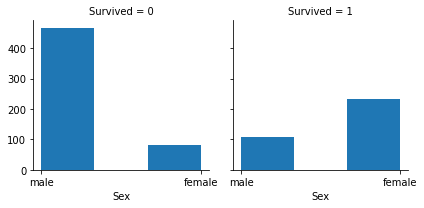

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=3)
# classification histogram

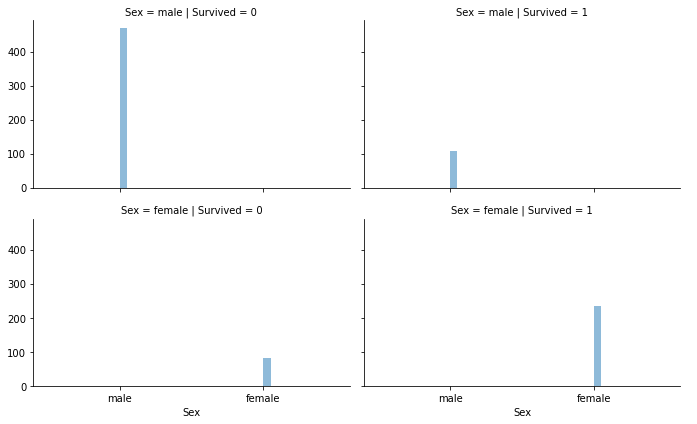

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex',  aspect=1.6)
grid.map(plt.hist, 'Sex', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# the data shows that the female passengers had a better chance of survival so we should add this data to our model

In [26]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df.head()
#dropping Ticket and Cabin as they are irrelevant

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


In [28]:
combine = [train_df, test_df]

In [29]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
print(dataset['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [31]:
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [32]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [33]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [35]:
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64


In [36]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [37]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [38]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [39]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)


Mean Age =  29


In [40]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [41]:
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [42]:
trainnew =pd.read_csv('train_preprocessed.csv')
testnew =pd.read_csv('test_preprocessed.csv')
testnew

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,34.5,7.8292,2,6
1,893,3,1,47.0,7.0000,0,7
2,894,2,0,62.0,9.6875,2,6
3,895,3,0,27.0,8.6625,0,6
4,896,3,1,22.0,12.2875,0,7
...,...,...,...,...,...,...,...
413,1305,3,0,29.0,8.0500,0,6
414,1306,1,1,39.0,108.9000,1,3
415,1307,3,0,38.5,7.2500,0,6
416,1308,3,0,29.0,8.0500,0,6


In [46]:
X_train = trainnew.drop("Survived", axis=1)
Y_train = trainnew["Survived"]
X_test  = testnew.drop("PassengerId", axis=1).copy()

In [47]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0